# Rotionales

* Productivity: to save analytics time by synchronizing SQL code usage in the EDW and standalone Python environment.
* Communication: to ease team collaboration via SQL code written in Python file (e.g. Jupyter Notebook), which should be more intuitive.
* Data analysis: to maximize the analysis capability by taking advantage of the features in both SQL data wrangling and Python extensive libraries.

![image.png](attachment:image.png)

In [ ]:
from IPython.display import Image
Image(url="image.png")

# Background at ROC
99% of the repair data is stored in EDW sever from different sources; a combination of DBMS tools will be used depending on the data source and task requirement; SQL is used in EDW environment and Python is used in a separate environment for further analysis, e.g. visualisation

# Part 1: simulate SQL data analysis in python environment
* SELECT and the FROM
* Join with Filters
* Group by with Filters
* Functions: e.g. round


In [3]:
#Improts
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
# data source： European Soccer Database

path = "./input/"  #Insert path here
database = path + 'db.sqlite'

## 1.1 Create the connection to the database

In [91]:
db_connect = sqlite3.connect(database)

tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", db_connect)
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


## 1.2 Basic query to list Players
 test on "SELECT and the FROM"

In [41]:
Players = pd.read_sql("""SELECT *
                        FROM Player;""", db_connect)
Players.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


## 1.3 List of leagues and their country
test on join function

In [92]:
leagues = pd.read_sql("""SELECT *
                        FROM League
                        JOIN Country ON Country.id = League.country_id;""", db_connect)
leagues

,id,country_id,name,id,name
0,1,1,Belgium Jupiler League,1,Belgium
1,1729,1729,England Premier League,1729,England
2,4769,4769,France Ligue 1,4769,France
3,7809,7809,Germany 1. Bundesliga,7809,Germany
4,10257,10257,Italy Serie A,10257,Italy
5,13274,13274,Netherlands Eredivisie,13274,Netherlands
6,15722,15722,Poland Ekstraklasa,15722,Poland
7,17642,17642,Portugal Liga ZON Sagres,17642,Portugal
8,19694,19694,Scotland Premier League,19694,Scotland
9,21518,21518,Spain LIGA BBVA,21518,Spain


## 1.4 List of teams
ORDER BY defines the sorting of the output - ascending or descending (DESC)

LIMIT, limits the number of rows in the output - after the sorting

In [93]:
teams = pd.read_sql("""SELECT *
                        FROM Team
                        ORDER BY team_long_name
                        LIMIT 10;""", db_connect)
teams

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,16848,8350,29,1. FC Kaiserslautern,KAI
1,15624,8722,31,1. FC Köln,FCK
2,16239,8165,171,1. FC Nürnberg,NUR
3,16243,9905,169,1. FSV Mainz 05,MAI
4,11817,8576,614,AC Ajaccio,AJA
5,11074,108893,111989,AC Arles-Avignon,ARL
6,49116,6493,1714,AC Bellinzona,BEL
7,26560,10217,650,ADO Den Haag,HAA
8,9537,8583,57,AJ Auxerre,AUX
9,9547,9829,69,AS Monaco,MON


## 1.5 List of matches of Germany
test on join with filters

In [94]:
list_matches = pd.read_sql("""SELECT Match.id,
                                    date,
                                    stage,
                                    season,
                                    League.name AS league_title,
                                    Country.name AS country_title,
                                    away_team_goal,
                                    home_team_goal

                                FROM Match
                                JOIN Country on Country.id = Match.country_id
                                JOIN League on League.id = Match.league_id
                                LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
                                LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id
                                WHERE country_title = 'Germany'
                                ORDER by date
                                LIMIT 10;""", db_connect)
list_matches

,id,date,stage,season,league_title,country_title,away_team_goal,home_team_goal
0,7809,2008-08-15 00:00:00,1,2008/2009,Germany 1. Bundesliga,Germany,2,2
1,7810,2008-08-16 00:00:00,1,2008/2009,Germany 1. Bundesliga,Germany,3,2
2,7811,2008-08-16 00:00:00,1,2008/2009,Germany 1. Bundesliga,Germany,0,3
3,7812,2008-08-16 00:00:00,1,2008/2009,Germany 1. Bundesliga,Germany,1,2
4,7814,2008-08-16 00:00:00,1,2008/2009,Germany 1. Bundesliga,Germany,2,2
5,7815,2008-08-16 00:00:00,1,2008/2009,Germany 1. Bundesliga,Germany,3,0
6,7817,2008-08-16 00:00:00,1,2008/2009,Germany 1. Bundesliga,Germany,0,1
7,7813,2008-08-17 00:00:00,1,2008/2009,Germany 1. Bundesliga,Germany,2,0
8,7816,2008-08-17 00:00:00,1,2008/2009,Germany 1. Bundesliga,Germany,3,1
9,7915,2008-08-22 00:00:00,2,2008/2009,Germany 1. Bundesliga,Germany,0,0


## 1.6 Leagues by season
test on groupby function

In [95]:
leages_over_season = pd.read_sql("""SELECT Country.name AS country_title,
                                        League.name AS league_title,
                                        season,
                                        count(distinct stage) AS number_of_stages,
                                        count(distinct HT.team_long_name) AS number_of_teams,
                                        avg(home_team_goal) AS avg_home_team_scores,
                                        avg(away_team_goal) AS avg_away_team_goals, 
                                        avg(home_team_goal-away_team_goal) AS avg_goal_dif, 
                                        avg(home_team_goal+away_team_goal) AS avg_goals, 
                                        sum(home_team_goal+away_team_goal) AS total_goals                                       
                                FROM Match
                                JOIN Country on Country.id = Match.country_id
                                JOIN League on League.id = Match.league_id
                                LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
                                LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id
                                WHERE country_title in ('England', 'France', 'Germany', 'Italy', 'Poland')
                                GROUP BY Country.name, League.name, season
                                HAVING count(distinct stage) > 10
                                ORDER BY Country.name, League.name, season DESC
                                ;""", db_connect)
leages_over_season

,country_title,league_title,season,number_of_stages,number_of_teams,avg_home_team_scores,avg_away_team_goals,avg_goal_dif,avg_goals,total_goals
0,England,England Premier League,2015/2016,38,20,1.492105,1.207895,0.284211,2.700000,1026
1,England,England Premier League,2014/2015,38,20,1.473684,1.092105,0.381579,2.565789,975
2,England,England Premier League,2013/2014,38,20,1.573684,1.194737,0.378947,2.768421,1052
3,England,England Premier League,2012/2013,38,20,1.557895,1.239474,0.318421,2.797368,1063
4,England,England Premier League,2011/2012,38,20,1.589474,1.215789,0.373684,2.805263,1066
5,England,England Premier League,2010/2011,38,20,1.623684,1.173684,0.450000,2.797368,1063
6,England,England Premier League,2009/2010,38,20,1.697368,1.073684,0.623684,2.771053,1053
7,England,England Premier League,2008/2009,38,20,1.400000,1.078947,0.321053,2.478947,942
8,France,France Ligue 1,2015/2016,38,20,1.436842,1.089474,0.347368,2.526316,960
9,France,France Ligue 1,2014/2015,38,20,1.410526,1.081579,0.328947,2.492105,947


<AxesSubplot:title={'center':'Average Goals per Game Over Time'}>

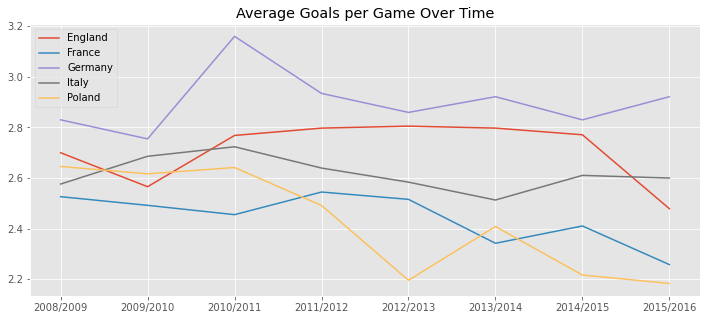

In [96]:
df = pd.DataFrame(index=np.sort(leages_over_season['season'].unique()), columns=leages_over_season['country_title'].unique())

df.loc[:,'England'] = list(leages_over_season.loc[leages_over_season['country_title']=='England','avg_goals'])
df.loc[:,'France']   = list(leages_over_season.loc[leages_over_season['country_title']=='France','avg_goals'])
df.loc[:,'Germany']   = list(leages_over_season.loc[leages_over_season['country_title']=='Germany','avg_goals'])
df.loc[:,'Italy']   = list(leages_over_season.loc[leages_over_season['country_title']=='Italy','avg_goals'])
df.loc[:,'Poland']   = list(leages_over_season.loc[leages_over_season['country_title']=='Poland','avg_goals'])

t_Average_goal = df.plot(figsize=(12,5),title='Average Goals per Game Over Time')
t_Average_goal

<AxesSubplot:title={'center':'Average Goals Difference Home vs Away'}>

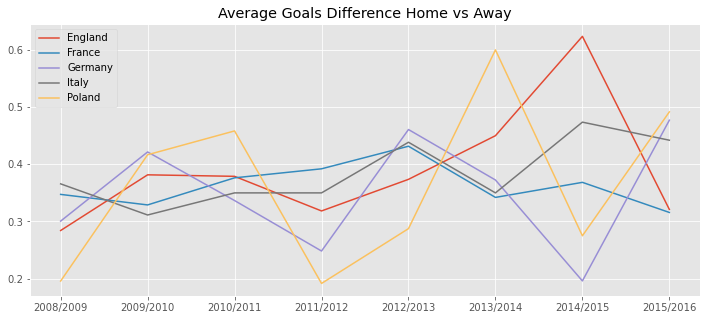

In [97]:
df = pd.DataFrame(index=np.sort(leages_over_season['season'].unique()), columns=leages_over_season['country_title'].unique())

df.loc[:,'England'] = list(leages_over_season.loc[leages_over_season['country_title']=='England','avg_goal_dif'])
df.loc[:,'France']   = list(leages_over_season.loc[leages_over_season['country_title']=='France','avg_goal_dif'])
df.loc[:,'Germany']   = list(leages_over_season.loc[leages_over_season['country_title']=='Germany','avg_goal_dif'])
df.loc[:,'Italy']   = list(leages_over_season.loc[leages_over_season['country_title']=='Italy','avg_goal_dif'])
df.loc[:,'Poland']   = list(leages_over_season.loc[leages_over_season['country_title']=='Poland','avg_goal_dif'])

Goal_difference = df.plot(figsize=(12,5),title='Average Goals Difference Home vs Away')
Goal_difference

## 1.7 Body profile vs Rating
test on Sub Queries and Functions

In [98]:
players_profile_over_rating = pd.read_sql("""SELECT CASE
                                        WHEN ROUND(height)<160 then 160
                                        WHEN ROUND(height)>190 then 190
                                        ELSE ROUND(height)
                                        END AS calc_height, 
                                        COUNT(height) AS distribution,
                                        AVG(weight) AS avg_weight,
                                        (avg(PA_Grouped.avg_overall_rating)) AS avg_overall_rating,
                                        (avg(PA_Grouped.avg_potential)) AS avg_potential

                            FROM PLAYER
                            LEFT JOIN (SELECT Player_Attributes.player_api_id, 
                                        avg(Player_Attributes.overall_rating) AS avg_overall_rating,
                                        avg(Player_Attributes.potential) AS avg_potential  
                                        FROM Player_Attributes
                                        GROUP BY Player_Attributes.player_api_id) 
                                        AS PA_Grouped ON PLAYER.player_api_id = PA_Grouped.player_api_id
                            GROUP BY calc_height
                            ORDER BY calc_height
                                ;""", db_connect)
players_profile_over_rating

,calc_height,distribution,avg_weight,avg_overall_rating,avg_potential
0,160.0,3,122.000000,71.841106,76.545047
1,163.0,9,137.222222,69.135958,74.630241
2,165.0,62,140.629032,66.891988,72.983008
3,168.0,118,144.127119,67.500518,73.124182
4,170.0,403,147.799007,67.726903,73.379056
5,173.0,530,152.824528,66.980272,72.848746
6,175.0,1188,156.111953,66.805204,72.258774
7,178.0,1489,160.665547,66.367212,71.943339
8,180.0,1388,165.261527,66.419053,71.846394
9,183.0,1954,170.167861,66.634380,71.754555


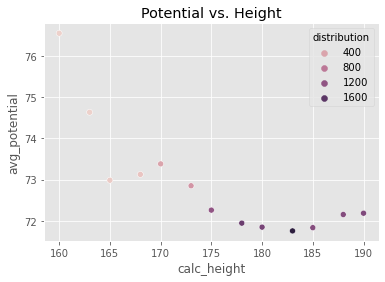

In [99]:
ax = sns.scatterplot(x='calc_height',
                y='avg_potential',
                hue='distribution',
                data=players_profile_over_rating)
ax.set_title('Potential vs. Height')
plt.show()

In [100]:
df_corr = players_profile_over_rating[['calc_height','avg_weight',
    'avg_overall_rating','avg_potential']].dropna().corr()
df_corr

,calc_height,avg_weight,avg_overall_rating,avg_potential
calc_height,1.000000,0.990540,-0.630617,-0.802581
avg_weight,0.990540,1.000000,-0.677844,-0.830188
avg_overall_rating,-0.630617,-0.677844,1.000000,0.962704
avg_potential,-0.802581,-0.830188,0.962704,1.000000


<AxesSubplot:>

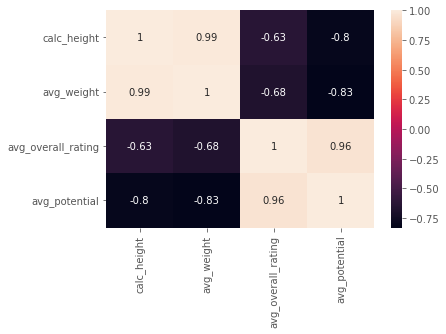

In [101]:
sns.heatmap(df_corr, annot=True)

# Part 2: Function to connect SQL Server database via ODBC

In [11]:
import pyodbc
import pandas as pd

def get_db_data_da(sqlstatement,
                driver = "{ODBC Driver 18 for SQL Server}",
                server = "sqlservername",
                userid = 'user_id',
                pw = 'user_pw', # Don't do this!!!
                database = "database_name"):

    '''
        get_db_data takes a SQL query as input and returns a result

        arguments:

            sqlstatement = query you want to execute
            driver = database driver to use
            server = database server name
            database = database name
    '''

    conn = pyodbc.connect("Driver=" + driver + ";"
                          "Server=" + server + ";"
                          "Database=" + database + ";"
                          "Trusted_Connection=yes;"
                          "uid=" + userid + ";"
                          "pwd=" + pw + ";")

    cur = conn.cursor()

    # result = cur.execute(sqlstatement).fetchall()

    result = pd.read_sql(sqlstatement, conn)

    # cur.close()
    conn.close()

    return result